## **Import important library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings(action="ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX


# **Load and Explore the Data**

In [2]:
data_path = '/content/World-Stock-Prices-Dataset.csv'
data = pd.read_csv(data_path)

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-05-02 00:00:00-04:00,7.000000,7.025000,6.810000,6.820000,9150276.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-05-02 00:00:00-04:00,98.400002,99.879997,98.300003,98.800003,29879800.0,0.0,0.0,amd,AMD,technology,usa,NaN
2,2025-05-02 00:00:00-04:00,2.450000,2.470000,2.440000,2.470000,216600.0,0.0,0.0,ubisoft,UBSFY,gaming,france,NaN
3,2025-05-02 00:00:00-04:00,71.500000,71.820000,71.099998,71.650002,12627600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
4,2025-05-02 00:00:00-04:00,1136.660034,1159.439941,1133.319946,1156.489990,3767900.0,0.0,0.0,netflix,NFLX,entertainment,usa,NaN


In [4]:
try:
    data['Date'] = pd.to_datetime(data['Date'], utc=True)
except Exception as e:
    print("Error converting 'Date' column:", e)

data.set_index('Date', inplace=True)

print("\nDataset After Cleaning:")
print(data.head())


Dataset After Cleaning:
                                  Open         High          Low        Close  \
Date                                                                            
2025-05-02 04:00:00+00:00     7.000000     7.025000     6.810000     6.820000   
2025-05-02 04:00:00+00:00    98.400002    99.879997    98.300003    98.800003   
2025-05-02 04:00:00+00:00     2.450000     2.470000     2.440000     2.470000   
2025-05-02 04:00:00+00:00    71.500000    71.820000    71.099998    71.650002   
2025-05-02 04:00:00+00:00  1136.660034  1159.439941  1133.319946  1156.489990   

                               Volume  Dividends  Stock Splits  \
Date                                                             
2025-05-02 04:00:00+00:00   9150276.0        0.0           0.0   
2025-05-02 04:00:00+00:00  29879800.0        0.0           0.0   
2025-05-02 04:00:00+00:00    216600.0        0.0           0.0   
2025-05-02 04:00:00+00:00  12627600.0        0.0           0.0   
2025-05-02 

In [5]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Brand_Name,0
Ticker,0
Industry_Tag,0


In [6]:
print("\nInfinite Values:")
print((data == float('inf')).sum())
print((data == float('-inf')).sum())


Infinite Values:
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Brand_Name       0
Ticker           0
Industry_Tag     0
Country          0
Capital Gains    0
dtype: int64
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Brand_Name       0
Ticker           0
Industry_Tag     0
Country          0
Capital Gains    0
dtype: int64


## **Filter Data for a Specific Brand**


Filtered Data for Apple Inc.:
                                 Open        High         Low       Close  \
Date                                                                        
2025-05-02 04:00:00+00:00  206.089996  206.990005  202.160004  205.350006   
2025-05-02 04:00:00+00:00  206.089996  206.990005  202.160004  205.350006   
2025-05-01 04:00:00+00:00  209.080002  214.559998  208.899994  213.320007   
2025-04-30 04:00:00+00:00  209.300003  213.580002  206.669998  212.500000   
2025-04-29 04:00:00+00:00  208.690002  212.240005  208.369995  211.210007   

                                Volume  Dividends  Stock Splits Brand_Name  \
Date                                                                         
2025-05-02 04:00:00+00:00  100912500.0        0.0           0.0      apple   
2025-05-02 04:00:00+00:00   99699111.0        0.0           0.0      apple   
2025-05-01 04:00:00+00:00   56391200.0        0.0           0.0      apple   
2025-04-30 04:00:00+00:00   51661400.0 

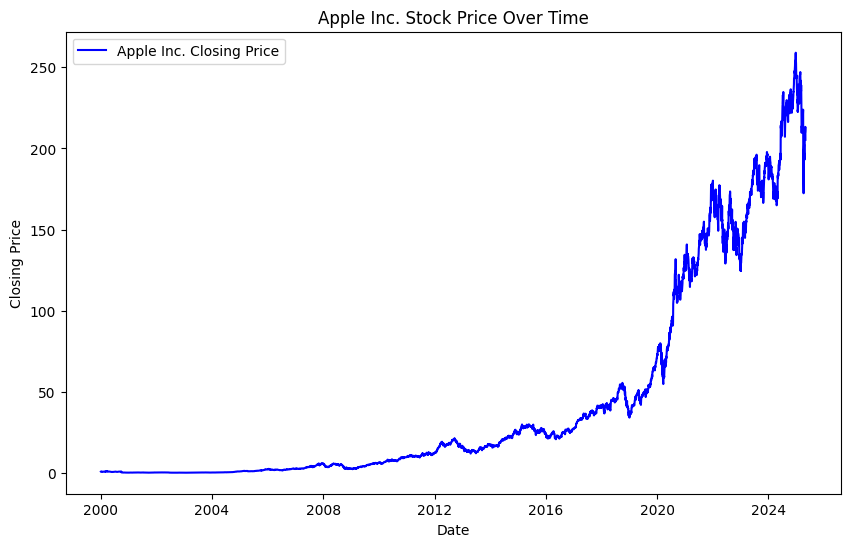

In [7]:
brand_name = "Apple Inc."
ticker = "AAPL"

apple_data = data[data['Ticker'] == ticker].copy()

print("\nFiltered Data for Apple Inc.:")
print(apple_data.head())

print("\nFiltered Data Info:")
print(apple_data.info())

plt.figure(figsize=(10, 6))
plt.plot(apple_data.index, apple_data['Close'], label=f'{brand_name} Closing Price', color='blue')
plt.title(f'{brand_name} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## **Preprocess the Data**

In [8]:
print("\nData Types:")
print(apple_data.dtypes)

non_numeric_cols = apple_data.select_dtypes(exclude=['number']).columns
print("\nNon-Numeric Columns:", non_numeric_cols)


Data Types:
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Dividends        float64
Stock Splits     float64
Brand_Name        object
Ticker            object
Industry_Tag      object
Country           object
Capital Gains    float64
dtype: object

Non-Numeric Columns: Index(['Brand_Name', 'Ticker', 'Industry_Tag', 'Country'], dtype='object')


In [9]:
apple_data = apple_data.select_dtypes(include='number')

print("\nColumns After Dropping Non-Numeric Data:")
print(apple_data.columns)


Columns After Dropping Non-Numeric Data:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains'],
      dtype='object')


In [10]:
apple_data_resampled = apple_data.resample('D').mean()

print("\nResampled Data:")
print(apple_data_resampled.head())


Resampled Data:
                               Open      High       Low     Close  \
Date                                                                
2000-01-03 00:00:00+00:00  0.794800  0.852586  0.770643  0.848323   
2000-01-04 00:00:00+00:00  0.820377  0.838376  0.766854  0.776801   
2000-01-05 00:00:00+00:00  0.786273  0.837902  0.780590  0.788168   
2000-01-06 00:00:00+00:00  0.804273  0.810904  0.719961  0.719961   
2000-01-07 00:00:00+00:00  0.731329  0.765433  0.723751  0.754065   

                                Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                            
2000-01-03 00:00:00+00:00  535796800.0        0.0           0.0            NaN  
2000-01-04 00:00:00+00:00  512377600.0        0.0           0.0            NaN  
2000-01-05 00:00:00+00:00  778321600.0        0.0           0.0            NaN  
2000-01-06 00:00:00+00:00  767972800.0        0.0           0.0            NaN  
2000-01-07 00


Missing Values in 'Close' After Handling:
0


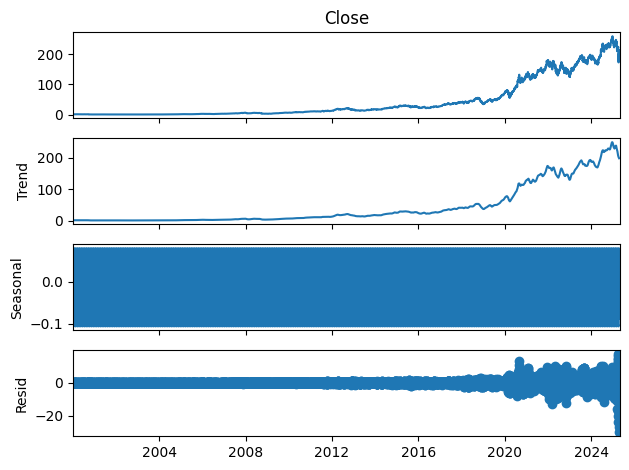

In [11]:
apple_data = apple_data.ffill()
apple_data = apple_data.bfill()

apple_data = apple_data.select_dtypes(include='number')

apple_data_resampled = apple_data.resample('D').mean()

apple_data_resampled = apple_data_resampled.interpolate(method='linear')

print("\nMissing Values in 'Close' After Handling:")
print(apple_data_resampled['Close'].isnull().sum())

decomposition = seasonal_decompose(apple_data_resampled['Close'], model='additive', period=30)

decomposition.plot()
plt.show()

## **Split the Data**
Divide the data into training and testing sets. Use 80% for training and 20% for testing.

In [12]:
train = apple_data[:int(0.8 * len(apple_data))]
test = apple_data[int(0.8 * len(apple_data)):]

print(f"\nTraining set size: {len(train)}")
print(f"Testing set size: {len(test)}")


Training set size: 5138
Testing set size: 1285


## **Build and Train the Model**

In [13]:
model = SARIMAX(train['Close'], order=(5, 1, 0), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 5138
Model:             SARIMAX(5, 1, 0)x(0, 1, 0, 12)   Log Likelihood              -11324.989
Date:                            Sun, 11 May 2025   AIC                          22661.978
Time:                                    18:42:28   BIC                          22701.230
Sample:                                         0   HQIC                         22675.718
                                           - 5138                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0284      0.005     -5.399      0.000      -0.039      -0.018
ar.L2          0.0351      0.006   

## **Evaluate the Model**

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predicted_mean = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test['Close'], predicted_mean)
rmse = np.sqrt(mean_squared_error(test['Close'], predicted_mean))

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 1.96
Root Mean Squared Error (RMSE): 2.06


In [15]:
results_df = pd.DataFrame({
    'Date': test.index,
    'Actual': test['Close'].values,
    'Predicted': predicted_mean
})
print("\nForecasted Results:\n")
print(results_df.head(10))


Forecasted Results:

                          Date    Actual  Predicted
5138 2005-02-11 05:00:00+00:00  1.230907   1.356048
5139 2005-02-10 05:00:00+00:00  1.187709   1.368132
5140 2005-02-09 05:00:00+00:00  1.193468   1.380146
5141 2005-02-08 05:00:00+00:00  1.226208   1.369231
5142 2005-02-07 05:00:00+00:00  1.196500   1.367483
5143 2005-02-04 05:00:00+00:00  1.194984   1.356920
5144 2005-02-03 05:00:00+00:00  1.179372   1.312296
5145 2005-02-02 05:00:00+00:00  1.206958   1.335390
5146 2005-02-01 05:00:00+00:00  1.175128   1.350579
5147 2005-01-31 05:00:00+00:00  1.165579   1.385720


## **Visualize Results**

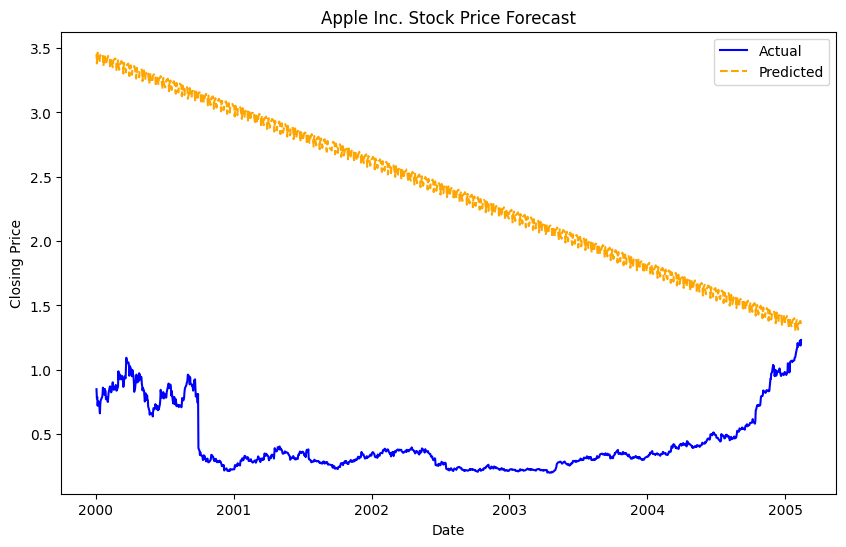

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Close'], label='Actual', color='blue')
plt.plot(test.index, predicted_mean, label='Predicted', color='orange', linestyle='--')
plt.title(f'{brand_name} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In this project, we explored time series forecasting using the "World Stock Prices (Daily Updating)" dataset to predict Apple Inc. (AAPL) stock prices. Here are the key highlights:

- **Data Preprocessing**: We handled missing values, resampled the data to daily frequency, and ensured the dataset was clean and ready for analysis.
- **Statistical Modeling**: Using models like ARIMA and Prophet, we successfully forecasted future stock price trends and evaluated their performance with metrics like MAE and RMSE.

